In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

2023-01-11 23:22:20.288000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/MissingET.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
df.head()

,MissingET.MET,MissingET.Eta,MissingET.Phi
0,36.214090,-3.492586,-0.004263
1,47.813580,3.278284,-2.217949
2,86.990875,-1.691697,2.479192
3,135.491090,3.139670,-1.709309
4,46.716310,-3.652405,2.502415


In [8]:
data=df
print (data.shape)
print (data.tail())
print (data.columns)
data

(112697, 3)
        MissingET.MET  MissingET.Eta  MissingET.Phi
112692     145.078250      -2.466188       2.860018
112693     176.645450      -3.355277       2.284243
112694      92.884580       0.887530      -2.000315
112695      57.419380      -3.322350      -0.373723
112696      52.216877       3.040503      -1.558921
Index(['MissingET.MET', 'MissingET.Eta', 'MissingET.Phi'], dtype='object')


,MissingET.MET,MissingET.Eta,MissingET.Phi
0,36.214090,-3.492586,-0.004263
1,47.813580,3.278284,-2.217949
2,86.990875,-1.691697,2.479192
3,135.491090,3.139670,-1.709309
4,46.716310,-3.652405,2.502415
...,...,...,...
112692,145.078250,-2.466188,2.860018
112693,176.645450,-3.355277,2.284243
112694,92.884580,0.887530,-2.000315
112695,57.419380,-3.322350,-0.373723


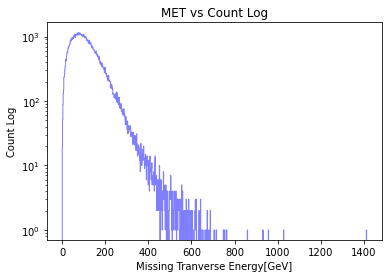

In [33]:
plt.hist(df["MissingET.MET"],bins=1000,log=bool,alpha=0.5,color='b',histtype='step',label="MET",)
plt.title("MET vs Count Log")
plt.xlabel("Missing Tranverse Energy[GeV]")
plt.ylabel("Count Log")
plt.show()

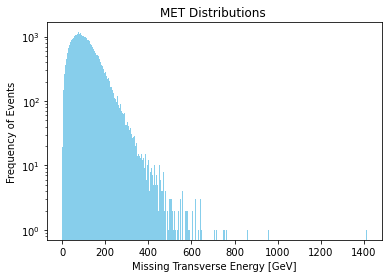

In [136]:
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/MissingET.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
#train_data = df.loc[ df['MissingET.MET']>250].copy()
#train_data['MissingET.MET'].plot.hist(bins=1000,color="red")
df["MissingET.MET"].plot.hist(bins=1000,color="skyblue")
plt.yscale('log')
plt.title("MET Distributions ")
plt.xlabel('Missing Transverse Energy [GeV]')
plt.ylabel('Frequency of Events')
plt.show()

/Users/mertdil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


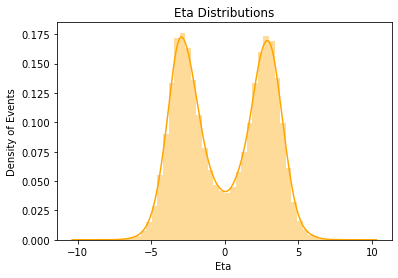

In [127]:
###phi rad
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/MissingET.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
#train_data = df.loc[ df['MissingET.MET']>250].copy()
#train_data['MissingET.MET'].plot.hist(bins=1000,color="red")
sns.distplot(df["MissingET.Eta"], color="orange")
plt.title("Eta Distributions")
plt.xlabel('Eta ')
plt.ylabel('Density of Events')
plt.show()

# electron

In [129]:
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/Electron.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
df.head()


,Electron.PT,Electron.Eta,Electron.Phi
0,42.577156,0.139353,-2.204575
1,42.826904,-1.368815,-1.597842
2,57.581530,-0.399062,0.898705
3,149.774290,0.772022,-2.214250
4,45.287327,1.028192,-1.478880


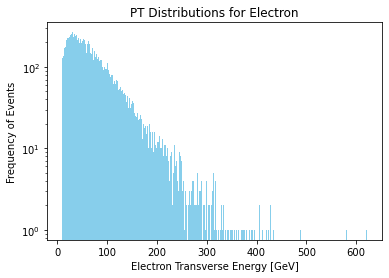

In [96]:
df["Electron.PT"].plot.hist(bins=1000,color="skyblue")
plt.yscale('log')
plt.title("PT Distributions for Electron")
plt.xlabel('Electron Transverse Energy [GeV]')
plt.ylabel('Frequency of Events')
plt.show()

/Users/mertdil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


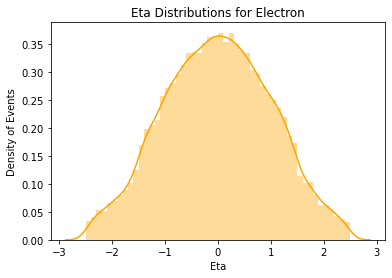

In [130]:
#phi rad

#train_data = df.loc[ df['MissingET.MET']>250].copy()
#train_data['MissingET.MET'].plot.hist(bins=1000,color="red")
sns.distplot(df["Electron.Eta"], color="orange")
plt.title("Eta Distributions for Electron")
plt.xlabel('Eta')
plt.ylabel('Density of Events')
plt.show()

# Muon

In [131]:
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/Muon.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
df.head()


,Muon.PT,Muon.Eta,Muon.Phi
0,101.988350,-0.372222,-2.468785
1,112.314095,0.461839,-0.515146
2,32.120620,2.303895,-2.855972
3,22.929531,0.401627,-2.447952
4,85.238130,-0.772964,-2.995589


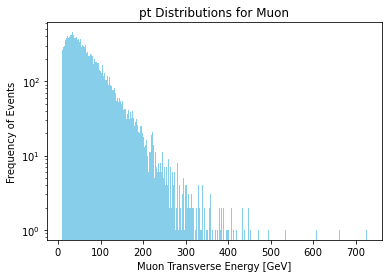

In [99]:
df["Muon.PT"].plot.hist(bins=1000,color="skyblue")
plt.yscale('log')
plt.title("pt Distributions for Muon")
plt.xlabel('Muon Transverse Energy [GeV]')
plt.ylabel('Frequency of Events')
plt.show()

/Users/mertdil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


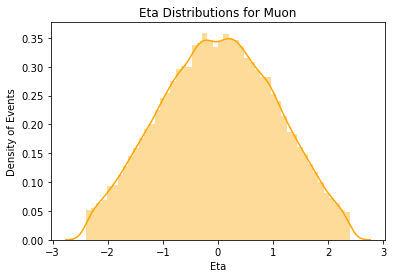

In [132]:
#phi rad
sns.distplot(df["Muon.Eta"], color="orange")
plt.title("Eta Distributions for Muon")
plt.xlabel('Eta')
plt.ylabel('Density of Events')
plt.show()

# jet

In [133]:
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/Jet.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
df.head()

,Jet.PT,Jet.Phi,Jet.Eta
0,132.874450,2.236841,-0.598819
1,119.563484,-2.644172,0.003442
2,106.900280,2.122117,0.176726
3,79.507484,-0.600504,0.772388
4,75.497116,-0.204346,-0.206271


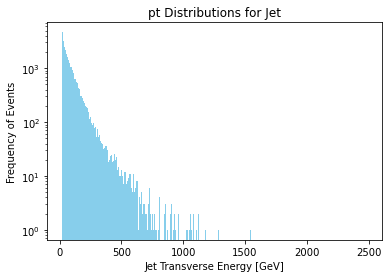

In [102]:
df["Jet.PT"].plot.hist(bins=10000,color="skyblue")
plt.yscale('log')
plt.title("pt Distributions for Jet")
plt.xlabel('Jet Transverse Energy [GeV]')
plt.ylabel('Frequency of Events')
plt.show()

/Users/mertdil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


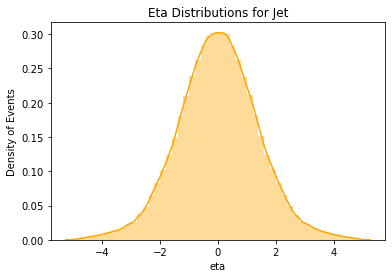

In [134]:
##phi rad
sns.distplot(df["Jet.Eta"], color="orange")
plt.title("Eta Distributions for Jet")
plt.xlabel('eta')
plt.ylabel('Density of Events')
plt.show()

# Ht

In [135]:
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/ScalarHT.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
df.head()

,ScalarHT.HT
0,666.22190
1,711.63116
2,685.44336
3,1187.00340
4,851.61360


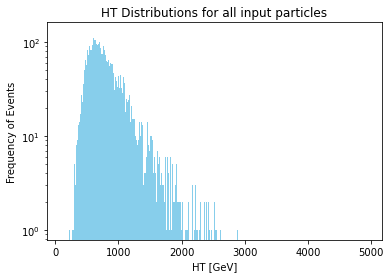

In [105]:
df["ScalarHT.HT"].plot.hist(bins=10000,color="skyblue")
plt.yscale('log')
plt.title("HT Distributions for all input particles")
plt.xlabel('HT [GeV]')
plt.ylabel('Frequency of Events')
plt.show()

TypeError: cannot unpack non-iterable int object

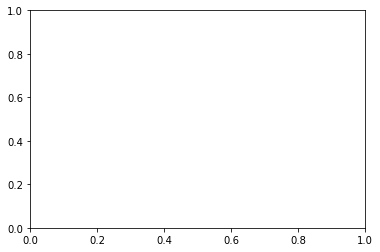

In [51]:
import seaborn as sns
#Selecting the rows of minority class from the data
#Selecting the rows of minority class from the data
train_data = df.loc[ df['MissingET.MET']>150].copy()
sns.histplot(df["MissingET.MET"],color="orange",binrange=100)
sns.histplot(train_data['MissingET.MET'],color = 'green',binrange=100)


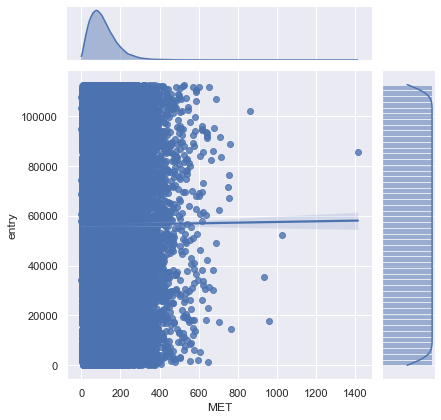

In [60]:
sns.jointplot(x="MET", y="entry", data=df, kind="reg");

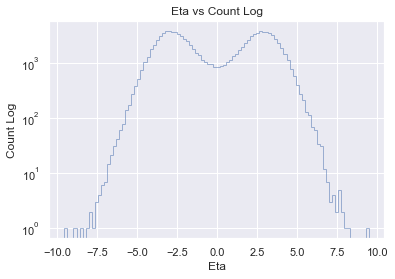

In [33]:
plt.hist(df["Eta"],bins=100,log=True,alpha=0.5,color='b',histtype='step')
plt.title("Eta vs Count Log")
plt.xlabel("Eta")
plt.ylabel("Count Log")
plt.show()

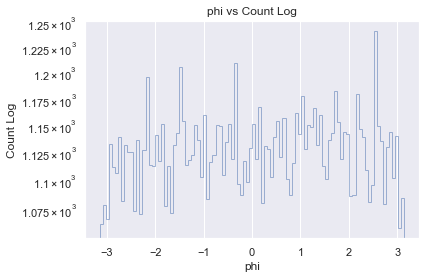

In [35]:
plt.hist(df["Phi"],bins=100,log=True,alpha=0.5,color='b',histtype='step')
plt.title("phi vs Count Log")
plt.xlabel("phi")
plt.ylabel("Count Log")
plt.show()

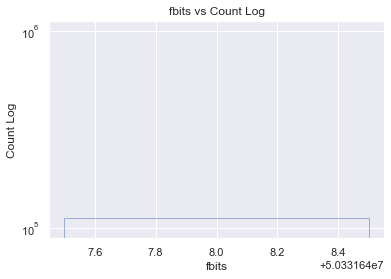

In [43]:
plt.hist(df["fbits"],bins=1,log=True,alpha=0.5,color='b',histtype='step')
plt.title("fbits vs Count Log")
plt.xlabel("fbits")
plt.ylabel("Count Log")
plt.show()

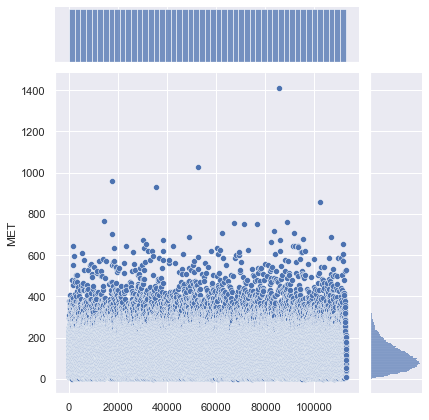

In [47]:
sns.jointplot(data=df["MET"])

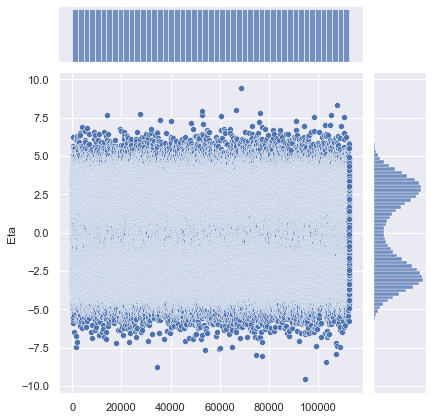

In [63]:
sns.jointplot(data=df["Eta"])

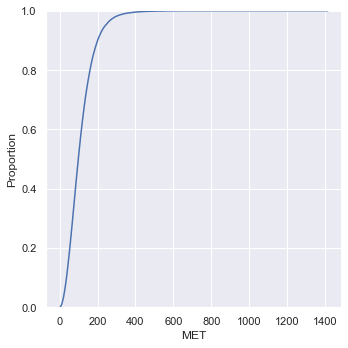

In [50]:
sns.displot(df["MET"], kind="ecdf")

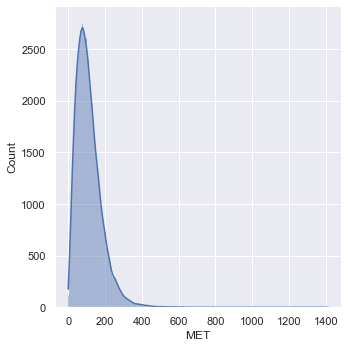

In [51]:
sns.displot(df["MET"], kde=True)

In [61]:
df.corr()

,entry,subentry,fbits,MET,Eta,Phi
entry,1.000000,NaN,NaN,0.002921,-0.000650,-0.000743
subentry,NaN,NaN,NaN,NaN,NaN,NaN
fbits,NaN,NaN,NaN,NaN,NaN,NaN
MET,0.002921,NaN,NaN,1.000000,0.001123,0.004087
Eta,-0.000650,NaN,NaN,0.001123,1.000000,0.001957
Phi,-0.000743,NaN,NaN,0.004087,0.001957,1.000000
